
# Housing Prices Classifier
#### Group of 1: Andrew Pantera CS 559A
#### 12/15/2020


In this project we will implement a classifier to predict whether a house in New Jersey has a garage based off the size and price of the house using support vector machines.

# The Problem

An MLS (or Multiple Listing Service) can provide a wide array of information on real estate listings in a given location. Some of this information, however, is often incomplete. These services exist because this data is valuable to companies who use the data to summarize and predict markets in order to inform real estate investments. If we were to take the most robust MLS data and fill in some of this missing data, we could collect, process, and resell this data at an extreme profit. This data is mostly used to predict trends in specific markets and groups, so whether the data for one specific listing is accurate is unimportant in our use case. In this project I use current real-world data for real estate listings in New Jersey from Bridge Interactive MLS. I have done some preprocessing on the data. The missing data that I will be filling in is whether or not a listing has a garage. I will use the area of the listing in Acres and the price of the listing in hundreds of thousands of dollars to predict whether a listing has a garage.

# ML Principles (connection to class material)

The two classes are as follows: Listing has a garage (1), and listing does not have a garage (0). The features I am using from the dataset are: Area of listing in acres (area), and the price of the listing in hundreds of thousands of dollars (price). I will be using support vector machines, which are discriminant functions, to classify this data. 

I will be using two linear support vector machines ("SVC with linear kernel" and "LinearSVC"), a support vector machine using a radial bias function, and a polynomial SVC. I am trying all four of these to see which seems like the best fit for the data. The difference between "SVC with linear kernel" and "LinearSVC" is that "SVC with linear kernel" minimizes the hinge loss, while "LinearSVC" minimizes the square hinge loss.

# The Data

There are two features, area and price, and two classes, has a garage and doesn't have a garage. There are 456 data points. I am using a randomly selected 50% as training data, and the other 50% as test data.

## Training Data:

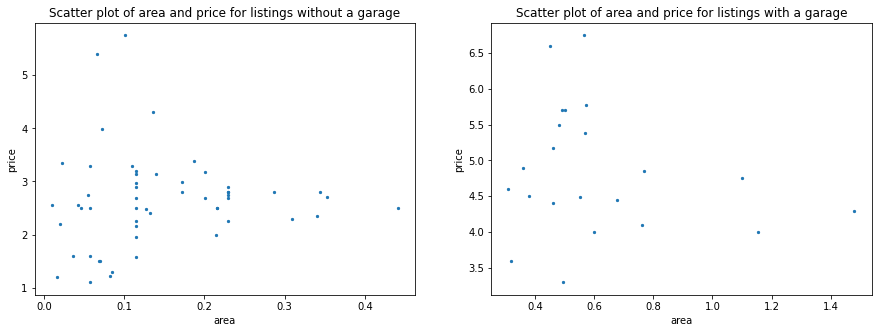

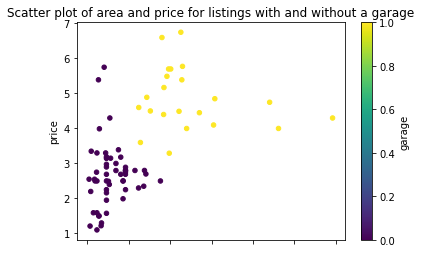

In [74]:
# START: OWN CODE
import json
import time
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm, datasets
from sklearn.model_selection import train_test_split
from mpl_toolkits import mplot3d
from ipywidgets import interact, fixed


# Make a weak classifier with SVM, turn it into a strong classifier with boosting. 

# Extract data and load data into a dataframe
f =  open("Listings.json", "r")
js = f.read()
data = pd.DataFrame(json.loads(js))

# Separate data into train data and test data
proportionTrainData = .5
trainData, testData = train_test_split(data, test_size=1-proportionTrainData)
X = trainData[["area","price"]].to_numpy()
y = trainData["garage"].to_numpy()

# Display raw data
fig, axs = plt.subplots(1,2, figsize=(15, 5))
trainData[trainData["garage"]==0].plot.scatter(x="area", y="price", marker=".", title="Scatter plot of area and price for listings without a garage", ax=axs[0]);
trainData[trainData["garage"]==1].plot.scatter(x="area", y="price", marker=".", title="Scatter plot of area and price for listings with a garage", ax=axs[1]);
plt.show()

trainData.plot.scatter(x="area", y="price", c="garage", colormap='viridis', title="Scatter plot of area and price for listings with and without a garage")
plt.show()

# Results

## Trained classifiers:

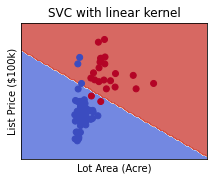

Mean Accuracy: 0.9210526315789473


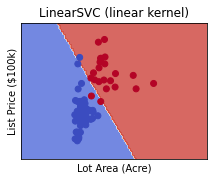

Mean Accuracy: 0.8947368421052632


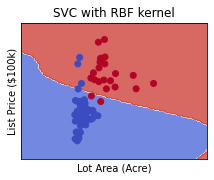

Mean Accuracy: 0.9078947368421053


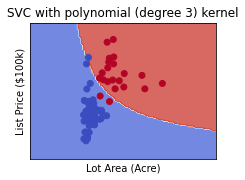

Mean Accuracy: 0.881578947368421
Linear svm weights: Area: 1.6169822720952334, Price: 0.946372620630501
Linear svm Intercept: -4.207292675520511


In [94]:
# Train four types of SVM on both area and price
C=.5
iterations = 1E7
svc = svm.SVC(kernel='linear', C=C, max_iter=iterations).fit(X, y)
rbf_svc = svm.SVC(kernel='rbf', gamma=0.7, C=C, max_iter=iterations).fit(X, y)
poly_svc = svm.SVC(kernel='poly', degree=3, C=C, max_iter=iterations).fit(X, y)
lin_svc = svm.LinearSVC(C=C, max_iter=iterations).fit(X, y)

test_classifier = lambda classifier: classifier.score(testData[["area","price"]].to_numpy(), testData["garage"].to_numpy())

# END: OWN CODE (The following code is adapted from scikit-learn, but some of it is mine)
# Display model classification boundary
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, (x_max-x_min)/100),
                     np.arange(y_min, y_max, (y_max-y_min)/100))

titles = ['SVC with linear kernel',
          'LinearSVC (linear kernel)',
          'SVC with RBF kernel',
          'SVC with polynomial (degree 3) kernel']

for i, clf in enumerate((svc, lin_svc, rbf_svc, poly_svc)):
    # Plot the decision boundary. For that, we will assign a color to each
    # point in the mesh [x_min, x_max]x[y_min, y_max].
    plt.figure(figsize=(8, 6))
    plt.subplot(2, 2, i + 1)
    plt.subplots_adjust(wspace=.4, hspace=.4)

    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.8)

    # Plot also the training points
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.coolwarm)
    plt.xlabel('Lot Area (Acre)')
    plt.ylabel('List Price ($100k)')
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.xticks(())
    plt.yticks(())
    plt.title(titles[i])
    plt.show()
    print("Mean Accuracy: " + str(test_classifier(clf)))

# START: OWN CODE
print("Linear svm weights: Area: "+ str(svc.coef_[0][0]) + ", Price: " + str(svc.coef_[0][1]))
print('Linear svm Intercept: ' + str(svc.intercept_[0]))

Here, our model is obviously underfitting the data. You can see in the RBF and Polynomial graphs, if the classification boundary was more extreme, the data would fit much better. Now, we tune our classifier to better fit the data. 

## Trained classifiers with increased regularization parameter:

/home/apantera/.local/lib/python3.8/site-packages/sklearn/svm/_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


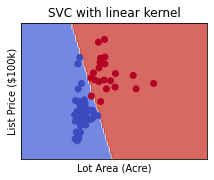

Mean Accuracy: 0.9342105263157895


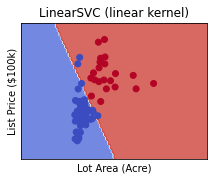

Mean Accuracy: 0.9605263157894737


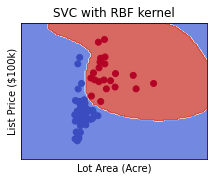

Mean Accuracy: 0.9605263157894737


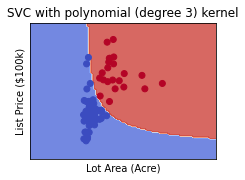

Mean Accuracy: 0.9736842105263158
Linear svm weights: Area: 96181.14374017715, Price: 9707.099304199219
Linear svm Intercept: -69446.28422825322


In [95]:
# Train four types of SVM on both area and price
C=1E10
iterations = 1E7
# END: OWN CODE (The following code is adapted from scikit-learn, but some of it is mine)
svc = svm.SVC(kernel='linear', C=C, max_iter=iterations).fit(X, y)
rbf_svc = svm.SVC(kernel='rbf', gamma=0.7, C=C, max_iter=iterations).fit(X, y)
poly_svc = svm.SVC(kernel='poly', degree=3, C=C, max_iter=iterations).fit(X, y)
lin_svc = svm.LinearSVC(C=C, max_iter=iterations).fit(X, y)

# Display model classification boundary
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, (x_max-x_min)/100),
                     np.arange(y_min, y_max, (y_max-y_min)/100))

titles = ['SVC with linear kernel',
          'LinearSVC (linear kernel)',
          'SVC with RBF kernel',
          'SVC with polynomial (degree 3) kernel']

for i, clf in enumerate((svc, lin_svc, rbf_svc, poly_svc)):
    # Plot the decision boundary. For that, we will assign a color to each
    # point in the mesh [x_min, x_max]x[y_min, y_max].
    plt.figure(figsize=(8, 6))
    plt.subplot(2, 2, i + 1)
    plt.subplots_adjust(wspace=.4, hspace=.4)
    

    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.8)

    # Plot also the training points
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.coolwarm)
    plt.xlabel('Lot Area (Acre)')
    plt.ylabel('List Price ($100k)')
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.xticks(())
    plt.yticks(())
    plt.title(titles[i])
    plt.show()
    print("Mean Accuracy: " + str(test_classifier(clf)))

# START: OWN CODE
print("Linear svm weights: Area: "+ str(svc.coef_[0][0]) + ", Price: " + str(svc.coef_[0][1]))
print('Linear svm Intercept: ' + str(svc.intercept_[0]))

## Conclusion

We can see from the graphs, and from the test results, that these models fit much better. The Mean Accuracy was calculated for each model from the testing data. All the models did well, all models but "SVC with linear kernel" were more than 95% accurate. "LinearSVC" outperformed "SVC with linear kernel", meaning in this case squaring the hinge loss before minimization resulted in a better classifier. We can also see, from the error report, that the linear classifier failed to converge within the restricted number of iterations during the training of the classifier. The fact that all other classifiers converged also points to it being the weakest classifier; the model doesn't fit the data well. The best classifier was the polynomial classifier, correctly classifying more than 97% of the test data. Judging visually from the graph, this is likely because the classification boundary followed a polynomial shape, not a radial shape, hence why our polynomial support vector machine outperformed our radial basis function support vector machine. If I were to take this project further, I would increase the size of the data pool I am working with, I would try to classify other missing fields in the data, and if I encountered data I could not accurately classify I would try to strengthen the classifier. 